<a href="https://colab.research.google.com/github/swat90/Data_science/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of second hand car prices**

Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
car = pd.read_csv(r"/content/drive/MyDrive/OASIS/car data.csv")
car.info() #301 entries, 9 columns, three integer, two float and 4 object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#convert to right format
# Convert 'Year' to datetime format
car['Year'] = pd.to_datetime(car['Year'], format='%Y')

In [ ]:
#Check for duplicates
print(car.duplicated().sum())#2 duplicates

car = car.drop_duplicates()
car.shape #299, 9

2


(299, 9)

In [ ]:
#Missing values
car.isnull().sum() #no missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

First and second moment business decision

In [ ]:
car.describe()

,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478
std,4.984240,8.566332,39015.170352,0.248720
min,0.100000,0.320000,500.000000,0.000000
25%,0.850000,1.200000,15000.000000,0.000000
50%,3.510000,6.100000,32000.000000,0.000000
75%,6.000000,9.840000,48883.500000,0.000000
max,35.000000,92.600000,500000.000000,3.000000


Third moment business decision

In [ ]:
car.skew()
#positively skewed, long tail on right side of distribution

<ipython-input-5-9cd3861227db>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.skew()


Selling_Price    2.536522
Present_Price    4.189255
Driven_kms       6.418134
Owner            7.590605
dtype: float64

Fourth moment business decision

In [ ]:
car.kurt()
#Positive kurtosis indicates heavier tails and a more peaked distribution, prsence of outliers

<ipython-input-6-7527182e51b8>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.kurt()


Selling_Price     9.482088
Present_Price    33.221336
Driven_kms       68.130422
Owner            72.821236
dtype: float64

Univariate analysis

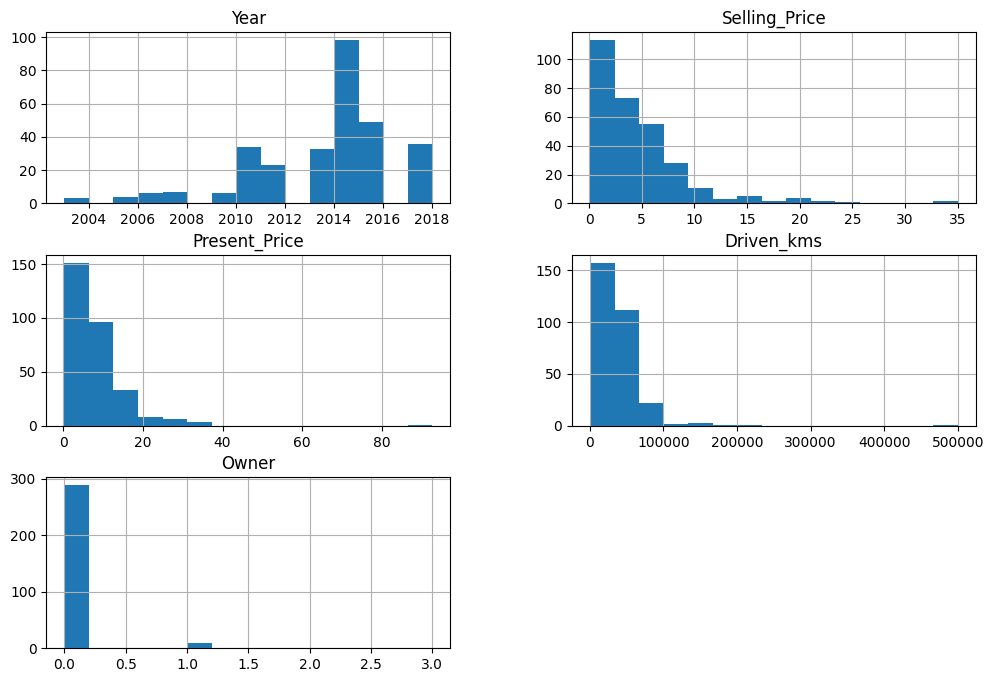

In [ ]:
# Create a histogram for the features
car.hist(bins=15, figsize=(12, 8))
plt.show()

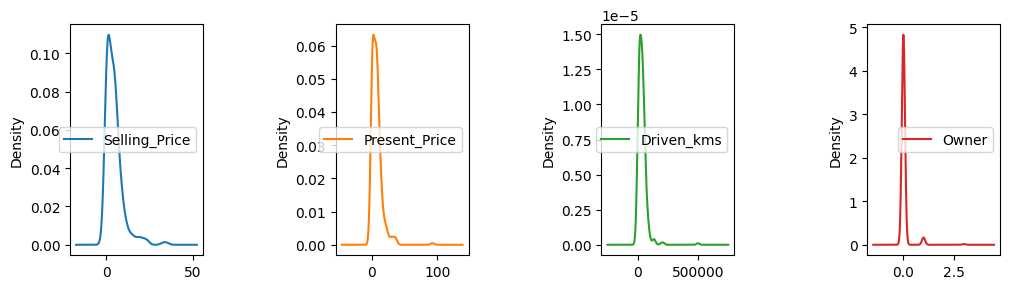

In [ ]:
# choose only numeric columns
numeric_columns = car.select_dtypes(include=['float64', 'int64'])

numeric_columns.plot(kind='density', subplots=True, layout=(1, 4), sharex=False, figsize=(12, 3))
plt.subplots_adjust(wspace=1)
plt.show()


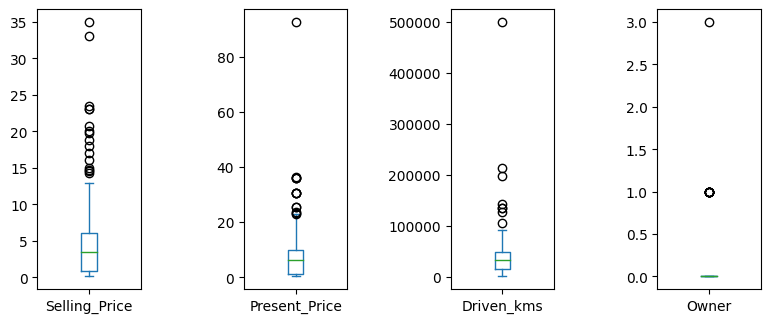

In [ ]:
numeric_columns.plot(kind ='box', subplots = True, layout =(2,5), sharex = False, sharey = False, figsize=(12, 8))
# Add space between subplots horizontally
plt.subplots_adjust(wspace=1)
plt.show()
#all the columns seems to have lot of outliers

Bivariate analysis

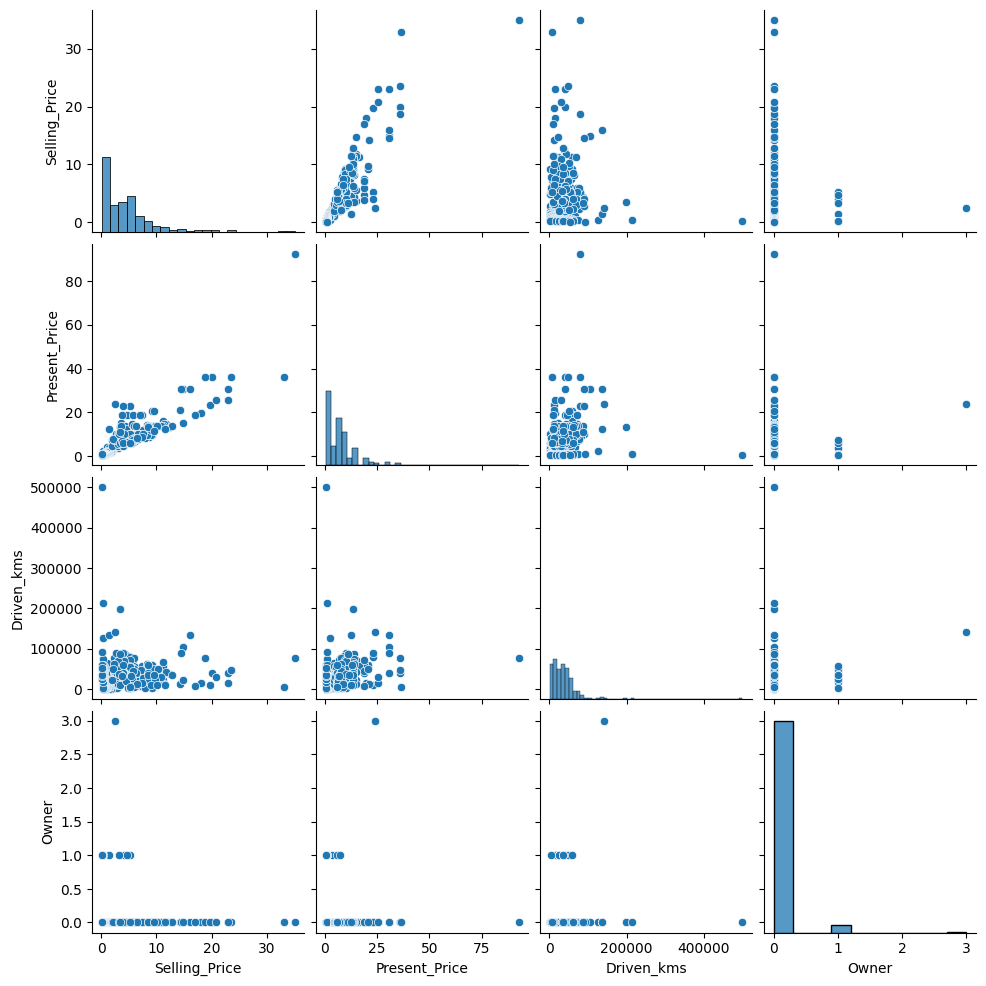

In [ ]:
sns.pairplot(numeric_columns)
plt.show()
#some positive correlation b/w selling price and present price

Correlation matrix

<ipython-input-18-57f91a153df2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car.corr()


<Axes: >

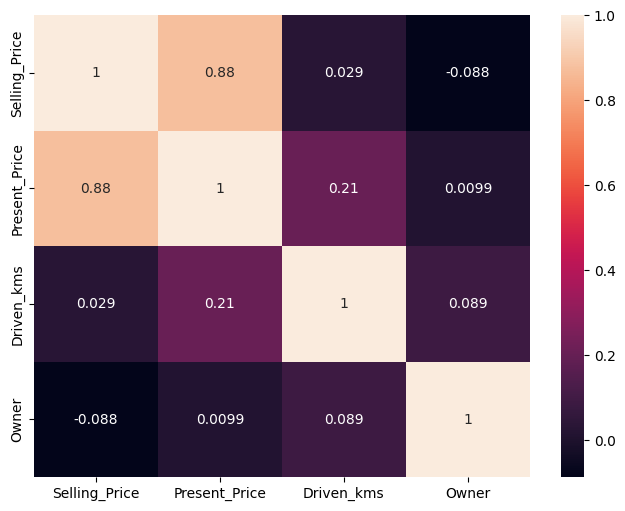

In [ ]:
corr = car.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)
#0.88 correlation b/w selling price and present price which is understandable

In [ ]:
#lets introduce a column with difference in prices
car['Price_Difference'] = car['Present_Price'] - car['Selling_Price']

In [ ]:
import plotly.express as px

# Plot for Transmission
fig_transmission = px.bar(car, x='Transmission', y='Price_Difference', title='Price Difference vs Transmission')

# Plot for Selling Type
fig_selling_type = px.bar(car, x='Selling_type', y='Price_Difference', title='Price Difference vs Selling Type')

# Plot for Fuel Type
fig_fuel_type = px.bar(car, x='Fuel_Type', y='Price_Difference', title='Price Difference vs Fuel Type')

# Show the plots
fig_transmission.show()
fig_selling_type.show()
fig_fuel_type.show()


In [ ]:
# Group by 'Year' and categorical variable, calculate mean Price_Difference
grouped_data = car.groupby(['Year', 'Transmission', 'Selling_type', 'Fuel_Type'])['Price_Difference'].mean().reset_index()

# Create a bar plot for Transmission
fig_transmission = px.bar(grouped_data, x='Year', y='Price_Difference', color='Transmission',
                          title='Mean Price Difference vs Transmission per Year',
                          labels={'Price_Difference': 'Mean Price Difference'})

# Create a bar plot for Selling Type
fig_selling_type = px.bar(grouped_data, x='Year', y='Price_Difference', color='Selling_type',
                           title='Mean Price Difference vs Selling Type per Year',
                           labels={'Price_Difference': 'Mean Price Difference'})

# Create a bar plot for Fuel Type
fig_fuel_type = px.bar(grouped_data, x='Year', y='Price_Difference', color='Fuel_Type',
                       title='Mean Price Difference vs Fuel Type per Year',
                       labels={'Price_Difference': 'Mean Price Difference'})

# Show the plots
fig_transmission.show()
fig_selling_type.show()
fig_fuel_type.show()




1. In 2006, the automatic cars have high price difference but this difference keeps comin down with years and in 2017 cars, almost same difference in price.  
2. Most of cars are sold by dealers rather than individuals. From 2014 cars, indiviual sell at less price difference than dealers.
3. CNG cars are very few and not much price difference. Cars with Diesel have high price difference than Petrol cars. From 2017, the difference b/w diesel and pterol cars is almost same.



Check the correlation b/w all the columns including categorical ones

In [ ]:
!pip install dython

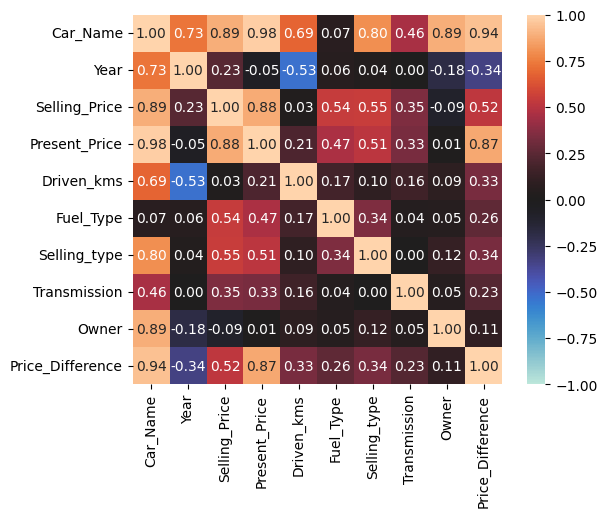

In [ ]:
from dython.nominal import associations
correlation_matrix = associations(car, nominal_columns=['Selling_type', 'Fuel_Type', 'Transmission', 'Car_Name'])





1. High correlation of car_name with selling price, present price, owner and price difference.
2. High correlations b/w selling price, present price and price difference.



In [ ]:
#Drop columns on the basis of correlations
car1 = car.drop(['Car_Name', 'Price_Difference'], axis = 1)
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           299 non-null    datetime64[ns]
 1   Selling_Price  299 non-null    float64       
 2   Present_Price  299 non-null    float64       
 3   Driven_kms     299 non-null    int64         
 4   Fuel_Type      299 non-null    object        
 5   Selling_type   299 non-null    object        
 6   Transmission   299 non-null    object        
 7   Owner          299 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 21.0+ KB


In [ ]:
# Creating a new feature called total no. of years old car as we can't send year format directly into simple ML models.
car1['Car_age'] = 2023 - car1['Year'].dt.year

#It's time to drop the Year column after the needed info is derived.
car1.drop(labels='Year',axis=1,inplace=True)
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Driven_kms     299 non-null    int64  
 3   Fuel_Type      299 non-null    object 
 4   Selling_type   299 non-null    object 
 5   Transmission   299 non-null    object 
 6   Owner          299 non-null    int64  
 7   Car_age        299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


One Hot encoding for categorical columns

In [ ]:
car_f = pd.get_dummies(car1,drop_first=True)
car_f.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [ ]:
car_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Selling_Price            299 non-null    float64
 1   Present_Price            299 non-null    float64
 2   Driven_kms               299 non-null    int64  
 3   Owner                    299 non-null    int64  
 4   Car_age                  299 non-null    int64  
 5   Fuel_Type_Diesel         299 non-null    uint8  
 6   Fuel_Type_Petrol         299 non-null    uint8  
 7   Selling_type_Individual  299 non-null    uint8  
 8   Transmission_Manual      299 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 15.2 KB


Scaling the values

In [ ]:
#Since, there were lot of outliers in the data and I don't think we should remove them as the higher price could be possible for some cars.
#Use MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
car_f_scaled = scaler.fit_transform(car_f)
car_f_scaled = pd.DataFrame(car_f_scaled, columns=car_f.columns)

# Now car_f_scaled contains the scaled values
car_f_scaled.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,0.093123,0.057109,0.053053,0.0,0.266667,0.0,1.0,0.0,1.0
1,0.133238,0.099913,0.085085,0.0,0.333333,1.0,0.0,0.0,1.0
2,0.204871,0.103273,0.012813,0.0,0.066667,0.0,1.0,0.0,1.0
3,0.078797,0.041504,0.009409,0.0,0.466667,0.0,1.0,0.0,1.0
4,0.128940,0.070980,0.083984,0.0,0.266667,1.0,0.0,0.0,1.0


Model training and Evaluation

In [ ]:
#split into dependent and independent variables
X = car_f_scaled.drop('Selling_Price', axis=1)
y = car_f_scaled['Selling_Price']

P-Value - P values are one of the best ways to determine if a variable is redundant(useful or not) but they provide no information. If a variable has a p-values >0.05, we can disregard it.

In [ ]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression, SelectKBest
f_regression(X,y)

p_values = f_regression(X, y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.623, 0.129, 0.   , 0.   , 0.   , 0.   , 0.   ])

In [ ]:
#Driven_kms and owner has pvalue >0.5, we can drop them both
X_f = X.drop(["Driven_kms", "Owner"], axis =1)
X_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Present_Price            299 non-null    float64
 1   Car_age                  299 non-null    float64
 2   Fuel_Type_Diesel         299 non-null    float64
 3   Fuel_Type_Petrol         299 non-null    float64
 4   Selling_type_Individual  299 non-null    float64
 5   Transmission_Manual      299 non-null    float64
dtypes: float64(6)
memory usage: 14.1 KB


In [ ]:
#Split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_f, y, test_size=0.25, random_state=365)

Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)

# Step 4: Evaluate the model
y_pred = model1.predict(x_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0041
R-squared (R2): 0.8490


Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
model2 = RandomForestRegressor(random_state=25)

# Fit the model to the training data
model2.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = model2.predict(x_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Random Forest R-squared (R2): {rf_r2:.4f}")

Random Forest Mean Squared Error (MSE): 0.0022
Random Forest R-squared (R2): 0.9197


GBT Regressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()

# Fit the model to the training data
model3.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gbr = model3.predict(x_test)

# Calculate performance metrics for the Random Forest model
gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_r2 = r2_score(y_test, y_pred_gbr)

print(f"Random Forest Mean Squared Error (MSE): {gbr_mse:.4f}")
print(f"Random Forest R-squared (R2): {gbr_r2:.4f}")

Random Forest Mean Squared Error (MSE): 0.0056
Random Forest R-squared (R2): 0.7930


Random Forest Regressor model gives the best results.

Hyperparameter optimization using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=10, cv=5, verbose=2, random_state=25, n_jobs=-1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=25, verbose=2)

In [ ]:
# Print the best parameters
print("Best Parameters:", rf_random.best_params_)

# Get the best model
best_rf_model = rf_random.best_estimator_

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}


In [ ]:
y_pred_best =best_rf_model.predict(x_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_best)
rf_r2 = r2_score(y_test, y_pred_best)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Random Forest R-squared (R2): {rf_r2:.4f}")

Random Forest Mean Squared Error (MSE): 0.0026
Random Forest R-squared (R2): 0.9045


We get the a little low RMSE and little high R2 value after Hyper parameter tuning than before. We will stick to our simple RF model without Hyperparameter tuning.

Conclusions:


1. Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
2. Cars sold by Individual tend to get less Selling Price when sold by Dealers.
3. RF regressor model gives the best R2 score.

